In [19]:
import pandas as pd
from functools import reduce

N = 50
s = 1

In [8]:
df = pd.read_csv("/data/elekin/data/results/handwriting/tmp/save_task_radius_subdag.csv", index_col=0)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
C102_2,-0.0,-236.529277,-81.113792,9.627268,-7.639935,299.983830,1316.237555,2842.978564,4163.396462,4663.239826,...,3095.005420,3189.635462,2987.488514,2697.013813,2702.678886,3100.134042,3477.497682,3248.575295,2241.962028,925.794800
C103_1,-0.0,-669.192641,402.160591,122.709211,-227.387037,363.333423,633.719682,741.848607,1282.479789,1489.403280,...,5851.780353,6119.677116,6093.872413,5769.915567,6131.024408,6220.795996,5577.279460,6145.824775,6776.883390,3990.911927
T008,-0.0,-761.410324,-75.199446,1712.094726,3286.792854,3760.644868,3460.918009,3231.388514,3356.129575,3499.827657,...,2190.824031,2198.649783,2204.480519,2219.198081,2210.355706,2177.245371,2218.736298,2335.518709,2179.101531,1325.730193
T018,0.0,-162.992091,75.647383,62.512053,-60.828060,8.424874,61.976993,-13.579253,-12.668389,48.011477,...,1373.258741,1412.670364,1340.083808,1338.741725,1437.516902,1369.118735,1268.264503,1462.455135,1513.114731,841.666221
C03_2,-0.0,-180.152953,42.615014,89.094131,-45.198493,-40.555242,55.865480,32.177905,-30.387775,8.443173,...,1435.259341,1387.203272,1338.007302,1418.149011,1455.547989,1327.891563,1317.936157,1541.020305,1480.164761,781.011853


In [20]:
def make_sliding(df, N, s=1):
    """

    :param df:
    :param N:
    :param s:
    :return:
    """
    dfs = [df.shift(-i).dropna().applymap(lambda x: [x]) for i in range(0, N + 1, s)]
    return reduce(lambda x, y: x.add(y), dfs).dropna()

In [27]:
df1 = make_sliding(df.T, N, s)

In [30]:
df1.head(10)

,C01_1,C01_2,C02_1,C02_2,C03_1,C03_2,C04_1,C04_2,C05_1,C05_2,...,T018,T021,T023_1,T023_2,T025,T026,T027,T028_1,T028_2,T029
0,"[0.0, -137.4402087238, -8.1989452064, 78.94950...","[0.0, -177.45171709209998, -0.3894230114, 98.4...","[0.0, -164.8637432292, -74.9211672272, 60.7340...","[-0.0, -173.5065810553, 12.533298113699999, 98...","[-0.0, -164.9787720135, -6.1047720686, 92.6364...","[-0.0, -180.15295255130002, 42.6150140244, 89....","[0.0, -161.0771729597, 40.0750088143, 75.29705...","[0.0, -110.2341566466, 99.3141549865, -41.0777...","[0.0, -148.9110093554, 57.573406835, 53.914026...","[0.0, -159.833281094, 56.581077727700006, 65.0...",...,"[0.0, -162.9920908264, 75.6473827944, 62.51205...","[-0.0, -55.5690999495, 59.1077701022, -44.2091...","[7.840470568500001, 146.3761817154, 421.621092...","[-0.0, -273.5562383068, 247.0251984551, -120.2...","[172.39908170180001, 896.0258958128, 4110.7407...","[0.0, -399.8484807439, 258.36204869240004, 34....","[0.0, -127.21246670010001, 126.36819133469999,...","[0.0, -384.0685044985, 1495.1963844084, 1593.5...","[-0.0, -53.1074657129, 3.9049048655000003, -3....","[-0.0, -237.3070611575, 1339.3891822589999, 17..."
1,"[-137.4402087238, -8.1989452064, 78.9495059649...","[-177.45171709209998, -0.3894230114, 98.477029...","[-164.8637432292, -74.9211672272, 60.734085700...","[-173.5065810553, 12.533298113699999, 98.78970...","[-164.9787720135, -6.1047720686, 92.6364657735...","[-180.15295255130002, 42.6150140244, 89.094131...","[-161.0771729597, 40.0750088143, 75.2970551014...","[-110.2341566466, 99.3141549865, -41.077722143...","[-148.9110093554, 57.573406835, 53.91402656029...","[-159.833281094, 56.581077727700006, 65.061055...",...,"[-162.9920908264, 75.6473827944, 62.5120525909...","[-55.5690999495, 59.1077701022, -44.2091717869...","[146.3761817154, 421.62109279699996, 2008.2541...","[-273.5562383068, 247.0251984551, -120.2879035...","[896.0258958128, 4110.740773690301, 3366.81041...","[-399.8484807439, 258.36204869240004, 34.68510...","[-127.21246670010001, 126.36819133469999, 21.9...","[-384.0685044985, 1495.1963844084, 1593.578446...","[-53.1074657129, 3.9049048655000003, -3.798985...","[-237.3070611575, 1339.3891822589999, 1779.482..."
10,"[-8.824869304, 30.008777456700003, 22.58090980...","[2.5842107415, 37.950870091599995, 5.042775087...","[-0.0033053428000000004, -33.7865251975, -15.9...","[61.8101008729, 80.0413086798, 37.1813252481, ...","[-9.2696143341, 31.218842275, 11.3322810421, -...","[48.4653071832, 4.63273283, -15.88799764099999...","[31.727389274, -11.4610213475, -23.0940897894,...","[27.0849787665, 3.7489537120999996, -6.1100997...","[9.1640175568, -27.396365441999997, 6.37058486...","[30.7399330447, -12.999376328499999, 16.551611...",...,"[15.6897771573, -15.655836826300002, 29.232558...","[2.7514664025999997, -3.5209732311, 16.2988461...","[2704.7770795554, 2645.9068907707, 2632.345961...","[721.0020564114, 1602.440862551, 508.224766210...","[3689.0657877747, 3564.8030295416997, 3674.602...","[989.4486156191999, 1635.0326830758, 2280.0973...","[19.5683762904, 68.2380781367, 27.5908194251, ...","[1867.4344748281, 1942.4548812691, 1880.838414...","[2147.5496029985, 2030.3699662617, 1791.728032...","[1753.3628407448002, 1758.2075238785999, 1754...."
100,"[129.60320394709998, 134.216463291, 142.425774...","[108.3204228008, 104.6194646341, 108.933087404...","[178.3624013097, 177.3284052539, 182.517697298...","[305.1281609336, 304.7628869393, 299.764391372...","[135.08011110209998, 140.921289029, 139.421291...","[109.66932172700001, 109.65809486100001, 103.4...","[3.9420458701, -1.4460284646000001, -1.0232681...","[179.9861836231, 181.08140112470002, 179.16037...","[14.0668137031, 16.3895658341, 12.618949891300...","[60.7584816501, 55.170713742, 58.1436818307, 5...",...,"[19.603215526099998, 14.860622621700001, 19.10...","[60.2480918914, 64.9548915654, 67.940581384499...","[2635.3084716879002, 2628.4003350608, 2633.177...","[3511.4543688815997, 3550.7161364026, 3524.845...","[

In [37]:
from os import path
metadf=pd.read_csv(path.join("/data/elekin/doc","metadata-202106-v1.csv"),index_col=0)
labels = (metadf['temblor'] == 'si').astype('int8')
labels.name = 'labels'
labels.index.name = 'labels'
labels.sample(5)

labels
C04_1     0
T023_1    1
C01_2     0
C08       0
C07_1     0
Name: labels, dtype: int8

In [52]:
df2 = df1.reset_index().melt(["index"])
df2= df2.drop('index', axis=1).set_index('variable')
df2.head(5)

,value
variable,
C01_1,"[0.0, -137.4402087238, -8.1989452064, 78.94950..."
C01_1,"[-137.4402087238, -8.1989452064, 78.9495059649..."
C01_1,"[-8.824869304, 30.008777456700003, 22.58090980..."
C01_1,"[129.60320394709998, 134.216463291, 142.425774..."
C01_1,"[588.0914095833999, 590.2659115258, 592.390888..."


In [53]:
df3 = df2.apply(lambda x: x.value, axis=1, result_type='expand')

In [56]:
df3.join(labels)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,labels
C01_1,0.000000,-137.440209,-8.198945,78.949506,15.312816,-48.835657,-10.701902,41.748265,18.772267,-24.300636,...,15.809809,17.826344,28.928074,29.779980,21.489811,22.632341,33.965646,37.642997,30.991587,0
C01_1,-137.440209,-8.198945,78.949506,15.312816,-48.835657,-10.701902,41.748265,18.772267,-24.300636,-8.824869,...,17.826344,28.928074,29.779980,21.489811,22.632341,33.965646,37.642997,30.991587,30.789951,0
C01_1,-8.824869,30.008777,22.580910,-9.773901,-5.203928,24.815867,24.993476,-0.674980,-2.654439,20.953638,...,41.249421,46.564851,40.982118,39.132995,48.084052,54.351784,49.528807,45.688541,52.403775,0
C01_1,129.603204,134.216463,142.425774,145.695636,144.939591,148.352642,155.735467,159.041434,157.626296,159.173611,...,234.324077,239.357843,243.043952,242.871357,243.893041,248.861252,252.882935,252.755706,253.158267,0
C01_1,588.091410,590.265912,592.390888,594.875325,597.185128,598.814583,600.421437,602.831263,605.560517,607.576515,...,702.470139,704.335469,706.608845,709.624258,712.501744,714.851591,717.409381,720.638661,723.936504,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T029,2238.561829,2239.537847,2240.944939,2240.894596,2241.052728,2242.517197,2243.097963,2245.797238,2248.933592,2253.175390,...,2300.136320,2301.877407,2302.512927,2302.829459,2302.640149,2303.483608,2303.411087,2304.828825,2305.187981,1
T029,2239.537847,2240.944939,2240.894596,2241.052728,2242.517197,2243.097963,2245.797238,2248.933592,2253.175390,2255.856220,...,2301.877407,2302.512927,2302.829459,2302.640149,2303.483608,2303.411087,2304.828825,2305.187981,2306.109538,1
T029,2240.944939,2240.894596,2241.052728,2242.517197,2243.097963,2245.797238,2248.933592,2253.175390,2255.856220,2258.016423,...,2302.512927,2302.829459,2302.640149,2303.483608,2303.411087,2304.828825,2305.187981,2306.109538,2307.058026,1
T029,2240.894596,2241.052728,2242.517197,2243.097963,2245.797238,2248.933592,2253.175390,2255.856220,2258.016423,2260.536401,...,2302.829459,2302.640149,2303.483608,2303.411087,2304.828825,2305.187981,2306.109538,2307.058026,2307.598181,1


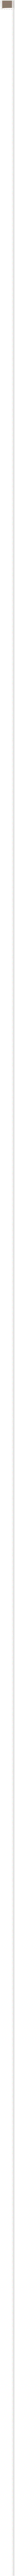

In [69]:
df4 = pd.read_csv("/data/elekin/data/results/handwriting/tmp/windowed_data_data_augmentation_radius.csv", index_col=0)

In [ ]:
_=df4.loc['C01_1'].T.plot()